In [554]:
import numpy as np
import matplotlib.pyplot as pl
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as pl
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

In [555]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


In [556]:
def compute_cost(X,y,theta):
    m=len(y)
    h=sigmoid(X@theta)
    epsilon=1e-5
    cost=(1/m)*(((-y).T@np.log(h+epsilon))-((1-y).T@np.log(1-h+epsilon))) 

In [557]:
def gradient_descent(X,y,params,learning_rate,iterations):
    m=len(y)
    cost_history=np.zeros((iterations,1))
    for i in range(iterations):
        params=params-(learning_rate/m)*X.T@(sigmoid(X@params)-y)
        cost_history[i]=compute_cost(X,y,params)
    return(cost_history,params)

In [558]:
def predict(X,params):
    return np.round(sigmoid(X@params))

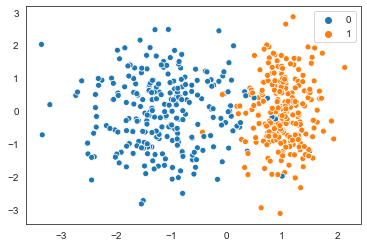

In [559]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]

sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

# ______________________________________________________

In [560]:
from sklearn.datasets import load_iris
iris=load_iris()

In [561]:
X=iris.data
y=iris.target
non_versicolor_labels=[0 for i in range(100)]
versicolor_labels=[1 for i in range(50)]

In [562]:
y=np.concatenate([non_versicolor_labels,versicolor_labels])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [563]:
perm=np.random.permutation(150)

In [564]:
X_train,X_test=X[perm][20:],X[perm][:20]
y_train,y_test=y[perm][20:],y[perm][:20]

In [565]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((130, 4), (20, 4), (130,), (20,))

In [566]:
versicolor=iris.data[100:,:2].astype(int)
nonversicolor=iris.data[:100,:2].astype(int)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
X_train=X_train[:,2:]
X_test=X_test[:,2:]

In [567]:
X_train

array([[3.7, 1. ],
       [4.2, 1.3],
       [1.5, 0.2],
       [4.8, 1.8],
       [4.2, 1.2],
       [1.4, 0.2],
       [5.1, 2. ],
       [6.1, 2.5],
       [6.6, 2.1],
       [1.3, 0.2],
       [4.3, 1.3],
       [1.5, 0.2],
       [6. , 1.8],
       [1.5, 0.4],
       [5.1, 1.9],
       [1.4, 0.1],
       [3.3, 1. ],
       [4.8, 1.8],
       [4.3, 1.3],
       [5.6, 1.8],
       [1.9, 0.4],
       [1.3, 0.2],
       [1.6, 0.2],
       [3.9, 1.1],
       [1.4, 0.2],
       [1.4, 0.2],
       [1.4, 0.2],
       [6. , 2.5],
       [4.5, 1.6],
       [5. , 1.9],
       [1.4, 0.3],
       [5.6, 2.4],
       [5.1, 1.9],
       [1.6, 0.2],
       [5.1, 1.5],
       [5. , 1.7],
       [4.4, 1.4],
       [6.7, 2.2],
       [6.3, 1.8],
       [4.7, 1.4],
       [5.9, 2.3],
       [1.6, 0.2],
       [4.1, 1.3],
       [4.7, 1.6],
       [5.9, 2.1],
       [4.1, 1. ],
       [4.9, 1.5],
       [1.7, 0.3],
       [3.6, 1.3],
       [1.5, 0.2],
       [3.5, 1. ],
       [1.7, 0.5],
       [5.1,

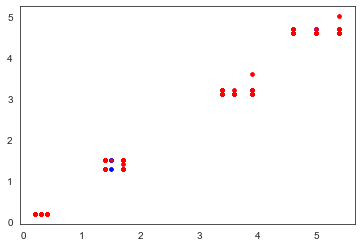

In [568]:
pl.plot(iris.data[versicolor][:,0],iris.data[versicolor][:,1],'b.')
pl.plot(iris.data[nonversicolor][:,0],iris.data[nonversicolor][:,1],'r.')


In [569]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

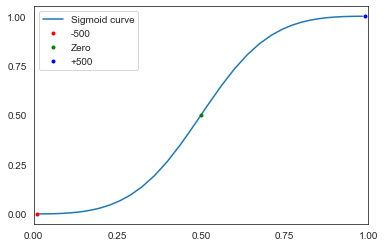

In [570]:
f,axes=pl.subplots(1,1)
pl.plot(sigmoid(np.linspace(-4,4)),sigmoid(np.linspace(-10,10)))
pl.xlim(0,1)
axes.plot(0.01,sigmoid(-500),'r.')
axes.plot(0.5,sigmoid(0),'g.')
axes.plot(0.99,sigmoid(500),'b.')
pl.xticks([0,0.25,0.50,0.75,1])
pl.yticks([0,0.25,0.50,0.75,1])
pl.legend(['Sigmoid curve','-500','Zero','+500'])
pl.show()

In [571]:
# here y is actual and yhat is predicted
def Logistic_loss(y,yhat):
    return -np.mean(y*np.log(yhat)+(1-y)*np.log(1-yhat))

In [572]:
W=np.zeros((2,1))
# or np.zeros([2,1])
b=np.zeros((1,1))
learning_rate=0.01
m=len(y_train)
W,b

(array([[0.],
        [0.]]),
 array([[0.]]))

In [573]:
los=[]
for epoch in range(5000):
    Z=np.matmul(X_train,W)+b
    A=sigmoid(Z)
    loss=Logistic_loss(y_train,A)
    los.append(loss)
    dz=A-y_train
    dw=(1/m)*np.matmul(X_train.T,dz)
    db=np.sum(dz)
    W=W-learning_rate*dw
    b=b-learning_rate*db
#     if epoch%100==0:
#         print(loss)
print(db)
accuracy_score(preds,y_train)

0.11694354797260259


0.5538461538461539

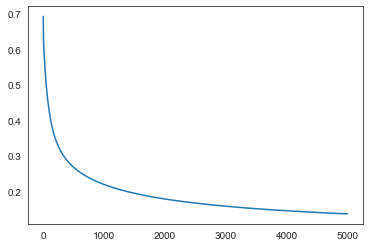

In [574]:
pl.plot(los)

In [575]:
W,b

(array([[2.53929903],
        [1.85120614]]),
 array([[-15.4613768]]))

In [576]:
preds=[]
for i in sigmoid(Z):
    if i>0.5:
        preds.append(1)
    else:
        preds.append(0)

In [577]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

In [578]:
f1_score(preds,y_train)

0.9523809523809524

In [579]:
accuracy_score(preds,y_train)

0.9692307692307692

In [580]:
Z[:5]

array([[ -4.21443918],
       [ -2.38957183],
       [-11.28132264],
       [  0.05941245],
       [ -2.57467431]])

In [581]:
preds[:5]

[0, 0, 0, 1, 0]

(-1, 3.5)

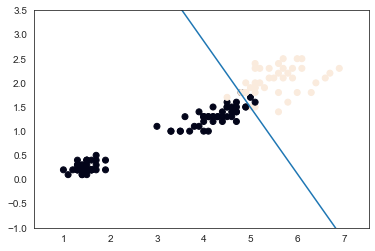

In [582]:
pl.scatter(X_train[:,0],X_train[:,1],c=y_train.ravel())
ax=pl.gca()
xvals=np.array(ax.get_xlim()).reshape(-1,1)
yvals=-(xvals*W[0][0]+b)/W[1][0]
pl.plot(xvals,yvals)
pl.ylim(-1,3.5)

(-1, 3.5)

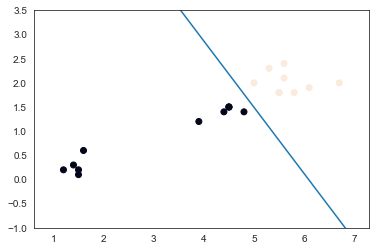

In [583]:
pl.scatter(X_test[:,0],X_test[:,1],c=(y_test.ravel()+50))
ax=pl.gca()
xvals=np.array(ax.get_xlim()).reshape(-1,1)
yvals=-(xvals*W[0][0]+b)/W[1][0]
pl.plot(xvals,yvals,)
pl.ylim(-1,3.5)

In [584]:
X_train

array([[3.7, 1. ],
       [4.2, 1.3],
       [1.5, 0.2],
       [4.8, 1.8],
       [4.2, 1.2],
       [1.4, 0.2],
       [5.1, 2. ],
       [6.1, 2.5],
       [6.6, 2.1],
       [1.3, 0.2],
       [4.3, 1.3],
       [1.5, 0.2],
       [6. , 1.8],
       [1.5, 0.4],
       [5.1, 1.9],
       [1.4, 0.1],
       [3.3, 1. ],
       [4.8, 1.8],
       [4.3, 1.3],
       [5.6, 1.8],
       [1.9, 0.4],
       [1.3, 0.2],
       [1.6, 0.2],
       [3.9, 1.1],
       [1.4, 0.2],
       [1.4, 0.2],
       [1.4, 0.2],
       [6. , 2.5],
       [4.5, 1.6],
       [5. , 1.9],
       [1.4, 0.3],
       [5.6, 2.4],
       [5.1, 1.9],
       [1.6, 0.2],
       [5.1, 1.5],
       [5. , 1.7],
       [4.4, 1.4],
       [6.7, 2.2],
       [6.3, 1.8],
       [4.7, 1.4],
       [5.9, 2.3],
       [1.6, 0.2],
       [4.1, 1.3],
       [4.7, 1.6],
       [5.9, 2.1],
       [4.1, 1. ],
       [4.9, 1.5],
       [1.7, 0.3],
       [3.6, 1.3],
       [1.5, 0.2],
       [3.5, 1. ],
       [1.7, 0.5],
       [5.1,